# Traffic Accidents Predictive Analysis of Canada

Traffic accident refers to an event in which a vehicle causes personal injury or 
property damage due to fault or accident on the road. Every year, around 1.3 million 
people around the world end their lives as a result of road traffic accidents. Another 
20 million to 50 million people suffered non-fatal injuries, many of them disabled as a 
result. Road traffic injuries take a huge economic toll on individuals, families and 
entire nations. These losses include the cost of treatment of the dead and injured, as 
well as the lost workforce of the deceased and the disabled due to injuries. However, 
road traffic injuries can be controlled through reasonable analysis and measures.


The purpose of this project is to enhance traffic safety policy, reduce the risk of 
traffic accidents through the study of risk factors. 

# Import Dataset and Library

In [2]:
from google.colab import files
uploaded = files.upload()  #upload dataset from local

Saving test99_to_2019_dataset.csv to test99_to_2019_dataset.csv


In [100]:
# Importing tools and writing data to dataframe
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

data = pd.read_csv(r'test99_to_2019_dataset.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
data.tail()    # showing dataframe

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
1048571,2001.0,7,5,15,2.0,2,36,2,1,1,...,1,1994,2,M,23,13,1,2,2,377934.0
1048572,2001.0,7,5,16,2.0,2,35,1,1,1,...,1,1994,1,M,49,11,1,2,1,377935.0
1048573,2001.0,7,5,16,2.0,2,35,1,1,1,...,1,1994,2,M,40,13,1,2,2,377935.0
1048574,2001.0,7,5,16,2.0,2,35,1,1,1,...,14,1983,1,F,33,11,2,9,5,377935.0
1048575,2001.0,7,5,11,2.0,2,21,1,1,1,...,1,1997,1,F,46,11,1,2,1,377947.0


# Data Preprocessing

As the purpose of this project, I will study the risk factors of traffic accident. Therefore, some features are irrelavent to my study and I will drop them in the data preprocessing step.

- Since my goal is about reducing the severity of the accident, the C_SEV or P_ISEV (i.e. Collision/Person Injury Severity) will be set as the target.

- The date and time are also important factors for visualization, so C_MNTH, C_WDAY and C_HOUR are needed. C_YEAR is not essential because we know the data only contains one year.

- Then, consider rest factors, we keep only the interesting ones: C_WTHR, C_RSUR and P_SAFE, which are the weather condition, road surface condition and the safety device usage of accidents.

In [101]:
data = data.drop(["C_VEHS", "C_CONF", "C_RCFG", "C_RALN", "C_TRAF", 
            "V_ID", "V_TYPE", "V_YEAR", "P_ID", "P_SEX", 
            "P_AGE", "P_PSN", "P_USER", "C_CASE",], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   C_YEAR  1048575 non-null  float64
 1   C_MNTH  1048575 non-null  object 
 2   C_WDAY  1048575 non-null  object 
 3   C_HOUR  1048575 non-null  object 
 4   C_SEV   1048575 non-null  float64
 5   C_WTHR  1048575 non-null  object 
 6   C_RSUR  1048575 non-null  object 
 7   P_ISEV  1048575 non-null  object 
 8   P_SAFE  1048575 non-null  object 
dtypes: float64(2), object(7)
memory usage: 72.0+ MB


### Deal with Missing Value

Convert object to float

In [102]:
data['C_MNTH'] = pd.to_numeric(data['C_MNTH'],errors = 'coerce')
data['C_WDAY'] = pd.to_numeric(data['C_WDAY'],errors = 'coerce')
data['C_HOUR'] = pd.to_numeric(data['C_HOUR'],errors = 'coerce')
data['C_WTHR'] = pd.to_numeric(data['C_WTHR'],errors = 'coerce')
data['C_RSUR'] = pd.to_numeric(data['C_RSUR'],errors = 'coerce')
data['P_ISEV'] = pd.to_numeric(data['P_ISEV'],errors = 'coerce')
data['P_SAFE'] = pd.to_numeric(data['P_SAFE'],errors = 'coerce')

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   C_YEAR  1048575 non-null  float64
 1   C_MNTH  1048537 non-null  float64
 2   C_WDAY  1047852 non-null  float64
 3   C_HOUR  1038358 non-null  float64
 4   C_SEV   1048575 non-null  float64
 5   C_WTHR  1031913 non-null  float64
 6   C_RSUR  1011252 non-null  float64
 7   P_ISEV  992634 non-null   float64
 8   P_SAFE  828472 non-null   float64
dtypes: float64(9)
memory usage: 72.0 MB


As shown, there are several missing values and outliers. We then need to decide what value should be filled in for missing value.

- **Personal Safety Device**


220104

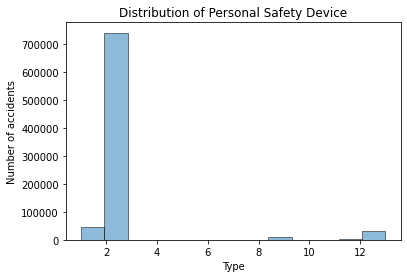

In [104]:
plt.hist(data["P_SAFE"], bins=13, edgecolor='k', alpha=0.5)
plt.xlabel("Type")
plt.ylabel("Number of accidents")
plt.title("Distribution of Personal Safety Device")
data["P_SAFE"].isna().sum()

As we can see, the personal safety device has the most missing values, and it is about 20% of the dataset. It may not be a good idea to fill in the NaN values, since those are inaccurate values and will cause errors to the result.

In order to make it less influential to the result, I decided to delete those NaN rows, as the missing values are randomly distributed and will not effect the time series much.

In [105]:
data.dropna(subset=['P_SAFE'], inplace = True)  # delete the row with NaN value in colume P_SAFE
data["P_SAFE"] = data["P_SAFE"].astype(int)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828472 entries, 2 to 1048575
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C_YEAR  828471 non-null  float64
 1   C_MNTH  828452 non-null  float64
 2   C_WDAY  828136 non-null  float64
 3   C_HOUR  821365 non-null  float64
 4   C_SEV   828472 non-null  float64
 5   C_WTHR  817696 non-null  float64
 6   C_RSUR  798148 non-null  float64
 7   P_ISEV  827716 non-null  float64
 8   P_SAFE  828472 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 63.2 MB


- **Weather and Road Surface**

10776

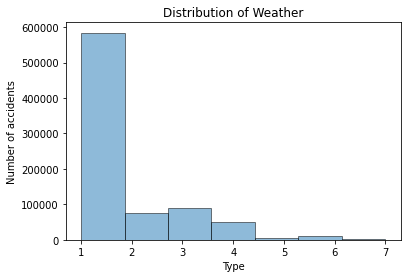

In [107]:
plt.hist(data["C_WTHR"], bins=7, edgecolor='k', alpha=0.5)    # plot the data
plt.xlabel("Type")
plt.ylabel("Number of accidents")
plt.title("Distribution of Weather")
data["C_WTHR"].isna().sum()  # check if there exists Nah values

30324

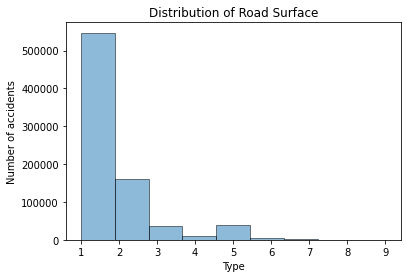

In [108]:
plt.hist(data["C_RSUR"], bins=9, edgecolor='k', alpha=0.5)
plt.xlabel("Type")
plt.ylabel("Number of accidents")
plt.title("Distribution of Road Surface")
data["C_RSUR"].isna().sum()

As we can see, about 80% data are 1，I decided to fill the Nah as 1.

In [109]:
data["C_WTHR"] = data["C_WTHR"].fillna(1)
data["C_WTHR"] = data["C_WTHR"].astype(int)

In [110]:
data["C_RSUR"] = data["C_RSUR"].fillna(1)
data["C_RSUR"] = data["C_RSUR"].astype(int)

- **Person Injury Severity and Case Severity**

756

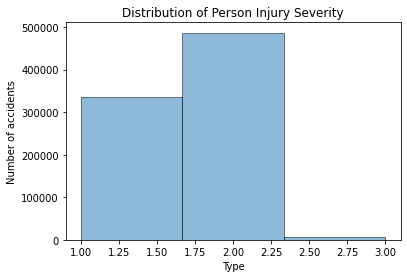

In [111]:
plt.hist(data["P_ISEV"], bins=3, edgecolor='k', alpha=0.5)
plt.xlabel("Type")
plt.ylabel("Number of accidents")
plt.title("Distribution of Person Injury Severity")
data["P_ISEV"].isna().sum()

0

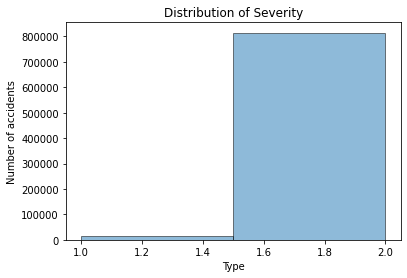

In [112]:
plt.hist(data["C_SEV"], bins=2, edgecolor='k', alpha=0.5)
plt.xlabel("Type")
plt.ylabel("Number of accidents")
plt.title("Distribution of Severity")
data["C_SEV"].isna().sum()

These two were initially considered to be the target data.

I noticed that the C_SEV is better than P_ISEV, since the former one tells a binary form of the severity that would differentiate light or no injury (1) from Serious injury and death (2), and it doesn't have NaN value.

Hence, I dropped the P_ISEV.

In [113]:
data = data.drop('P_ISEV', 1)  # delete the colume P_ISEV
data["C_SEV"] = data["C_SEV"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828472 entries, 2 to 1048575
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C_YEAR  828471 non-null  float64
 1   C_MNTH  828452 non-null  float64
 2   C_WDAY  828136 non-null  float64
 3   C_HOUR  821365 non-null  float64
 4   C_SEV   828472 non-null  int64  
 5   C_WTHR  828472 non-null  int64  
 6   C_RSUR  828472 non-null  int64  
 7   P_SAFE  828472 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 56.9 MB


- **Month, Day and Hour**

There are still a lot missing value for date value, I will fill the hour with the median value of it

In [115]:
data["C_HOUR"] = data["C_HOUR"].fillna(data.C_HOUR.median())
data["C_HOUR"] = data["C_HOUR"].astype(int)

For C_MNTH and C_WDAY, since very small of the whole dataset has NaN value, I will drop that row.

In [116]:
data.dropna(subset=['C_MNTH', 'C_WDAY'], inplace = True)  # delete the row with NaN value in colume P_ISEV
data["C_YEAR"] = data["C_YEAR"].fillna(data.C_YEAR.median())

Concert year, month and days of week into integar

In [117]:
data["C_MNTH"] = data["C_MNTH"].astype(int)
data["C_WDAY"] = data["C_WDAY"].astype(int)
data["C_YEAR"] = data["C_YEAR"].astype(int)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828136 entries, 2 to 1048575
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   C_YEAR  828136 non-null  int64
 1   C_MNTH  828136 non-null  int64
 2   C_WDAY  828136 non-null  int64
 3   C_HOUR  828136 non-null  int64
 4   C_SEV   828136 non-null  int64
 5   C_WTHR  828136 non-null  int64
 6   C_RSUR  828136 non-null  int64
 7   P_SAFE  828136 non-null  int64
dtypes: int64(8)
memory usage: 56.9 MB


Text(0.5, 1.0, 'Monthly view of Traffic Accidents from 1999 to 2019 in Canada')

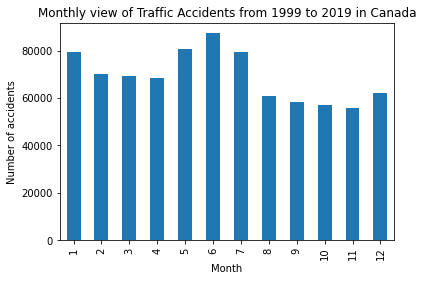

In [119]:
mnth_c = data['C_MNTH'].value_counts().sort_index()
mnth_c.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of accidents")
plt.title("Monthly view of Traffic Accidents from 1999 to 2019 in Canada")

### Split Training and Testing Set

The preprocessing part is done! Now we can split the training set and testing set. I decided to take a ratio of 80/20 for TRAINING/TEST.

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop("C_SEV", axis=1), data["C_SEV"], test_size=0.2, random_state=42)

In the Training set I split between the actual train set and the validation set, with a 80/20 ratio as well.

In [121]:
X_train.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_WTHR,C_RSUR,P_SAFE
695212,2000,9,2,17,1,1,2
753822,2000,10,6,13,2,2,2
165873,1999,6,3,20,1,1,2
878084,2001,2,3,15,1,1,2
867178,2001,2,1,17,4,3,2


In [122]:
y_train.head()

695212    2
753822    2
165873    2
878084    2
867178    2
Name: C_SEV, dtype: int64

# Modeling

We can build some models to train and test. Here I have already preprocessed data, so the feature selection is much more easier.

In [51]:
# import possible libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score

### XGBoosting

In [69]:
model_xgb = XGBClassifier(n_estimators=500,max_depth=10,n_jobs=-1)
model_xgb.fit(X_train,y_train)

XGBClassifier(max_depth=10, n_estimators=500, n_jobs=-1)

In [70]:
xgb_y_pred = model_xgb.predict(X_test)
accuracy_score(y_test, xgb_y_pred)

0.9839278382882122

In [71]:
precision_score(y_test, xgb_y_pred)

0.7016706443914081

In [72]:
recall_score(y_test, xgb_y_pred)

0.10385022960084776

Feature: 0, Score: 0.10830
Feature: 1, Score: 0.12118
Feature: 2, Score: 0.11379
Feature: 3, Score: 0.11954
Feature: 4, Score: 0.12142
Feature: 5, Score: 0.12235
Feature: 6, Score: 0.29342


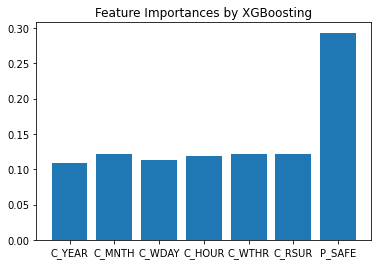

In [74]:
# display Feature Importances
importance = model_xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.title("Feature Importances by XGBoosting")
plt.bar(["C_YEAR", "C_MNTH", "C_WDAY", "C_HOUR", "C_WTHR", "C_RSUR", "P_SAFE"], importance)
plt.show()

The following is an alternative version, it takes about two hours to run. The value of evaluation functions are very close.

In [ ]:
from sklearn import metrics
from xgboost.sklearn import XGBClassifier

t0=time.time()

#Classifier Pipeline
train_feature_xgb = ["C_WDAY", "C_HOUR", "C_WTHR", "C_RSUR", "P_SAFE"]
train_transformer_xgb = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

xgb_preprocessor = ColumnTransformer(
    transformers=[('pipe', train_transformer_xgb, train_feature_xgb)])

xgb_pipe = Pipeline(steps=[('preprocessor', xgb_preprocessor),
            ('xgb', XGBClassifier(objective='binary:logistic', seed=1))])

# Set parameters
xgb_params = {
    'xgb__n_estimators': [100, 500],
    'xgb__max_depth':[5, 10, 50],
    'xgb__subsample': [0.6],
    # 'xgb__learning_rate': [0.1]
}

# Use GridSearchCV to test all values for n_estimators
grid_search_xgb = GridSearchCV(
    xgb_pipe, xgb_params, cv=5, verbose=3, n_jobs=2,
    scoring='accuracy')
grid_search_xgb.fit(X_train, y_train) # Fit the model to training data

print('best score {}'.format(grid_search_xgb.best_score_))
print('Time taken :' , time.time()-t0)

In [ ]:
### Show the best parameter's value
xgb_best = grid_search_xgb.best_estimator_
print(grid_search_xgb.best_params_)

### Random Forest

In [58]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

In [62]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [54]:
rf_y_pred = model_rf.predict(X_test)
accuracy_score(y_test, rf_y_pred)

0.9838433115173763

In [56]:
precision_score(y_test, rf_y_pred)

0.6074895977808599

In [57]:
recall_score(y_test, rf_y_pred)

0.15471564818085481

Feature: 0, Score: 0.05827
Feature: 1, Score: 0.24524
Feature: 2, Score: 0.15623
Feature: 3, Score: 0.33525
Feature: 4, Score: 0.07774
Feature: 5, Score: 0.07096
Feature: 6, Score: 0.05631


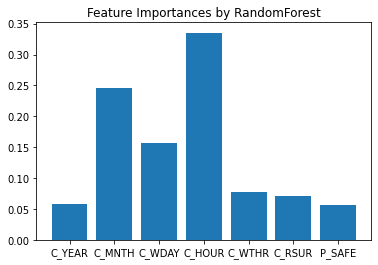

In [73]:
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.title("Feature Importances by RandomForest")
plt.bar(["C_YEAR", "C_MNTH", "C_WDAY", "C_HOUR", "C_WTHR", "C_RSUR", "P_SAFE"], importance)
plt.show()

The following is an alternative version, but it takes about one hour to run and the value of evaluation functions are very close.

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

#Classifier Pipeline
train_feature = ["C_WDAY", "C_HOUR", "C_WTHR", "C_RSUR", "P_SAFE"]
train_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[('pipe', train_transformer, train_feature)])

rf_pipe = Pipeline(steps=[('preprocessor', preprocessor), 
              ('rf', RandomForestClassifier())])

rf_params = {
        'rf__n_estimators': [100, 500, 1000],
        'rf__max_depth': [10, 50],
        'rf__min_samples_split': [2, 5],
        }

# Use GridSearchCV to test all values for n_estimators
grid_search_rf = GridSearchCV(rf_pipe, rf_params, cv=5, verbose=3, 
                n_jobs=2, scoring='accuracy')

grid_search_rf.fit(X_train, y_train) # Fit the model to training data

print('best score {}'.format(grid_search_rf.best_score_))

In [ ]:
### Show the best parameter's value
rf_best = grid_search_rf.best_estimator_
print(grid_search_rf.best_params_)

# Visualization and Results

The accuracy is pretty high for both models. Let's visualize the prediction.

### Add Datetime to Dataset

In [80]:
# Convert date to datetime
data['C_YEAR'] = data['C_YEAR'].apply(str)
data['C_MNTH'] = data['C_MNTH'].apply(str)
data['C_MNTH'] = data.C_MNTH.str.rjust(2,'0')
data['C_WDAY'] = data['C_WDAY'].apply(str)
data['C_WDAY'] = data.C_WDAY.str.rjust(2,'0')
# .rjust returns a new string of length width right-aligned from the 
# original string and padded with spaces. If the specified length is
# less than the length of the string, return the original string. 


data['date'] = data[['C_YEAR', 'C_MNTH', 'C_WDAY']].agg('-'.join, axis=1)
data["date"] = pd.to_datetime(data["date"],format='%Y-%m-%d')


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828136 entries, 2 to 1048575
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   C_YEAR  828136 non-null  object        
 1   C_MNTH  828136 non-null  object        
 2   C_WDAY  828136 non-null  object        
 3   C_HOUR  828136 non-null  int64         
 4   C_SEV   828136 non-null  int64         
 5   C_WTHR  828136 non-null  int64         
 6   C_RSUR  828136 non-null  int64         
 7   P_SAFE  828136 non-null  int64         
 8   date    828136 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 63.2+ MB


## Use Prophet to Predict

In [82]:
df = data.date.value_counts().sort_index()
df_pr = df.to_frame().reset_index()
df_pr.columns = ['ds','y']
df_pr.head()

,ds,y
0,1999-01-01,3617
1,1999-01-02,3265
2,1999-01-03,3525
3,1999-01-04,3671
4,1999-01-05,4853


In [83]:
df.index

DatetimeIndex(['1999-01-01', '1999-01-02', '1999-01-03', '1999-01-04',
               '1999-01-05', '1999-01-06', '1999-01-07', '1999-02-01',
               '1999-02-02', '1999-02-03',
               ...
               '2001-06-03', '2001-06-04', '2001-06-05', '2001-06-06',
               '2001-06-07', '2001-07-01', '2001-07-02', '2001-07-03',
               '2001-07-04', '2001-07-05'],
              dtype='datetime64[ns]', length=215, freq=None)

- Prediction without yearly seasonality:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


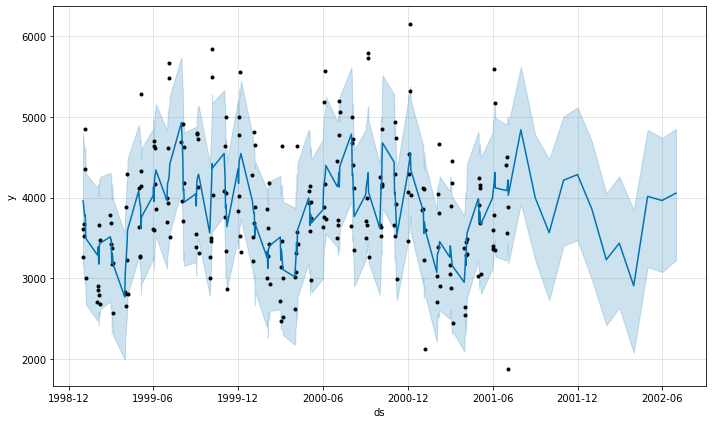

In [84]:
from fbprophet import Prophet
# Use prophet to build model
pr_m = Prophet(seasonality_mode='multiplicative').fit(df_pr)

# Predictions
future = pr_m.make_future_dataframe(periods=12, freq='MS')
prophet_pred = pr_m.predict(future)
fig = pr_m.plot(prophet_pred)

- Prediction with yearly seasonality & for future 10 years:

In [85]:
from fbprophet import Prophet
# Use prophet to build model
pr_m = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True).fit(df_pr)

# Predictions
future = pr_m.make_future_dataframe(periods=120, freq='MS')
prophet_pred = pr_m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


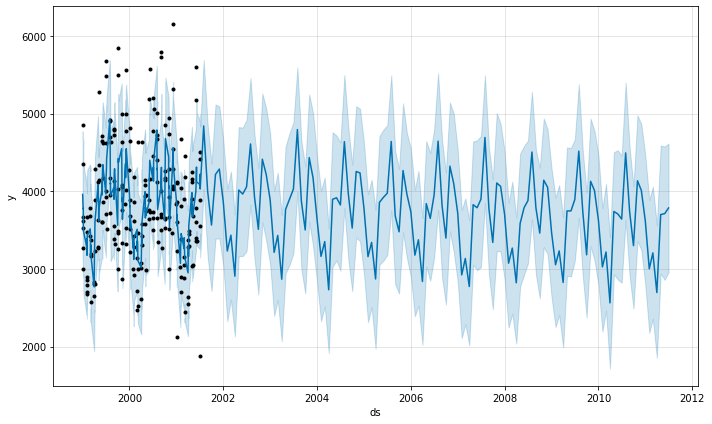

In [86]:
fig = pr_m.plot(prophet_pred)

## Other Observations

### 1. Which day of a week has most accidents?

In [123]:
day_c = data['C_WDAY'].value_counts().sort_index()
day_c = day_c.to_frame()
day_c.index= ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

Text(0.5, 1.0, 'Distribution of Daily Accidents')

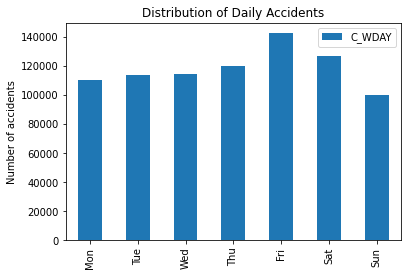

In [124]:
day_c.plot.bar()
plt.ylabel("Number of accidents")
plt.title("Distribution of Daily Accidents")

- Friday has the most traffic accidents.
- Sunday has the least traffic accidents.

### 2. What hour of day is most possible to have accidents?

In [125]:
hour_c = data['C_HOUR'].value_counts().sort_index()
hour_c = hour_c.to_frame()

Text(0.5, 1.0, 'Distribution of Hourly Accidents of 1999 to 2001 in Canada')

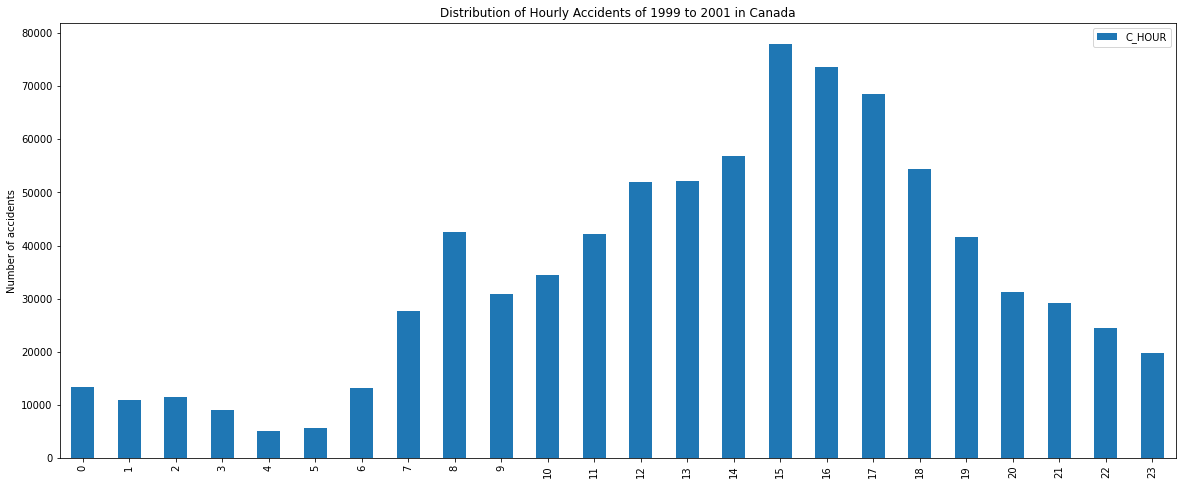

In [126]:
hour_c.plot.bar(figsize=(20,8))
plt.ylabel("Number of accidents")
plt.title("Distribution of Hourly Accidents of 1999 to 2001 in Canada")

- Obviously, the midnight has fewer accidents happen than usual.

- 15:00 to 17:59 reaches the peak of traffic accidents, which is reasonable since it is usual the evening rush hour.

### 3. Does bad weather affect traffic accident rate?

In [127]:
weather = data['C_WTHR'].value_counts().sort_index()
weather = weather.to_frame()
weather.index= ['Clear and sunny',
         'Overcast, cloudy but no precipitation',
         'Raining',
         'Snowing',
         'Freezing rain, sleet, hail',
         'Visibility limitation(e.g. fog)',
         'Strong wind']

Text(0.5, 1.0, 'Distribution of accidents based on weather')

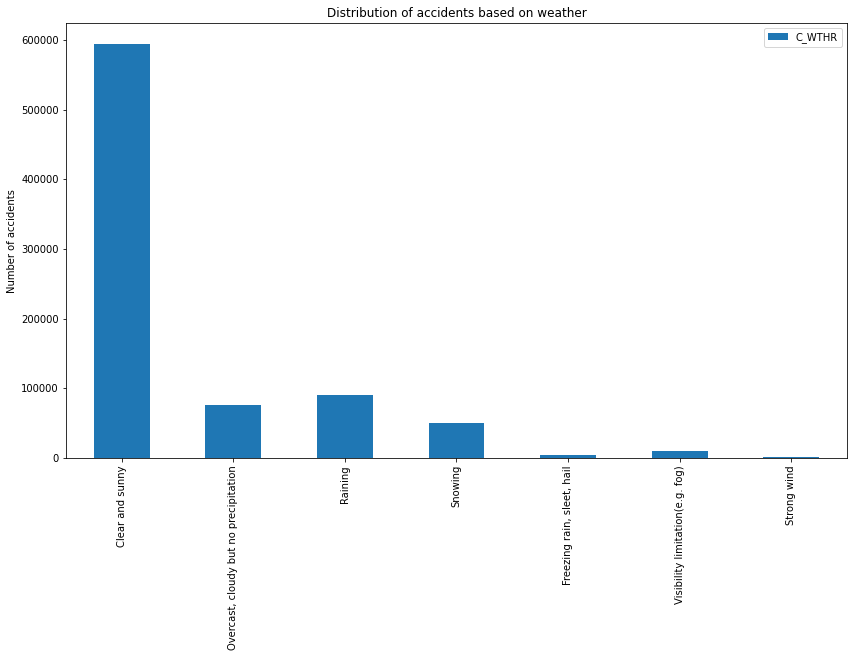

In [128]:
weather.plot.bar(figsize=(14,8))
plt.ylabel("Number of accidents")
plt.title("Distribution of accidents based on weather")

- Bad weather will not largely affect the accident rate. We need to be careful of traffic accident everyday.

### 4. Does road surface affect traffic accident rate?

In [129]:
rsurf = data['C_RSUR'].value_counts().sort_index()
rsurf = rsurf.to_frame()
rsurf.index= ['Dry, normal', 'Wet', 'Snow',
         'Slush', 'Icy', 'Sand',
         'Muddy', 'Oil', 'Flooded']

Text(0.5, 1.0, 'Distribution of accidents based on road surface')

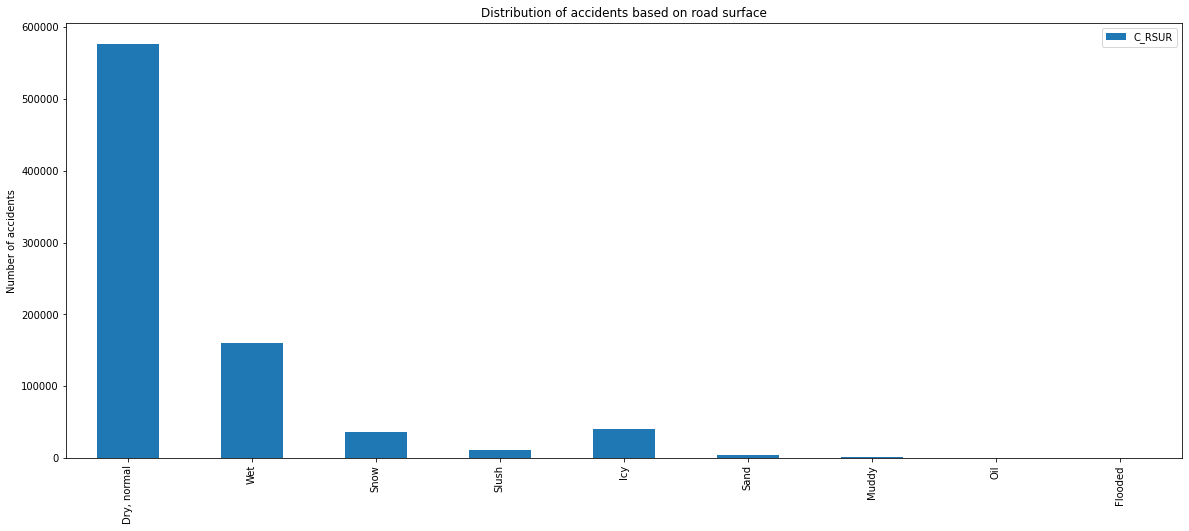

In [130]:
rsurf.plot.bar(figsize=(20,8))
plt.ylabel("Number of accidents")
plt.title("Distribution of accidents based on road surface")

### 5. Was the Safety Equipment used by the people involved?

In [131]:
safe_equi = data['P_SAFE'].value_counts().sort_index()
safe_equi = safe_equi.to_frame()
safe_equi

,P_SAFE
1,44312
2,740125
9,11432
10,29
11,4
12,1349
13,30885


Text(0.5, 1.0, 'Distribution of Safety Device Usage')

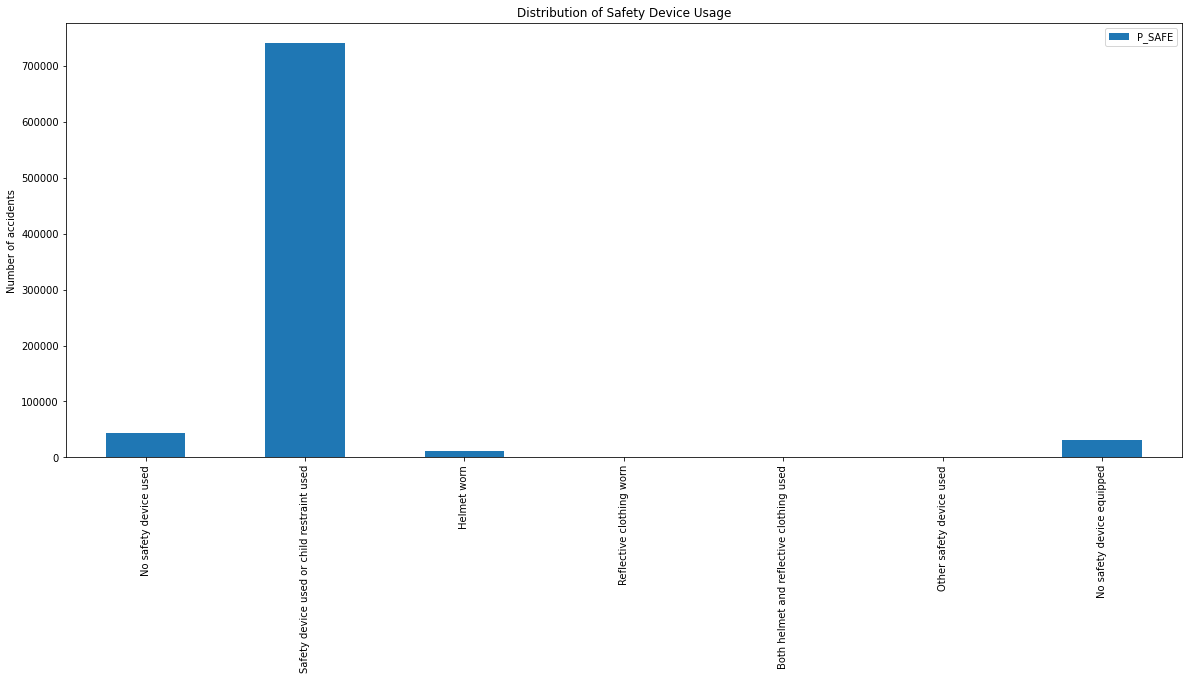

In [132]:
safe_equi.index= ['No safety device used', 
          'Safety device used or child restraint used',
          'Helmet worn',
          'Reflective clothing worn',
          'Both helmet and reflective clothing used',
          'Other safety device used',
          'No safety device equipped']
safe_equi.plot.bar(figsize=(20,8))
plt.ylabel("Number of accidents")
plt.title("Distribution of Safety Device Usage")

- Most people were wearing the safety device.

# Conclusion & Next steps

Using RandomForest, XGBoost and Prophet modeled separately, plus drawing some histograms, we have been able to obtain a lot of performance. However, there is still room for improvement.

In future, we can visualize the maximum differences returned by the models and try to understand them to extract more insights and consider new variables/transformations to be performed on the data.
If the data had more than just days of the week, but dates as well, I am sure our predictions would be much better.
